<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install akshare

In [2]:
!pip install datetime

In [3]:
!pip install ta

In [4]:
import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = '01810'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-02'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)
    df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 打印部分数据以验证
    print(df[['date', 'open', 'high', 'low', 'close', 'volume']])
except Exception as e:
    print(f"数据获取失败：{e}")


df_renamed = df.copy()
# 如果需要，将列名更改为首字母大写
df_renamed.columns = [col.capitalize() for col in df_renamed.columns]

# 打印结果
print(df_renamed)

            date   open   high    low  close       volume
862   2022-01-03  19.08  19.08  18.52  18.60   34724235.0
863   2022-01-04  18.72  18.80  18.34  18.56   49159666.0
864   2022-01-05  18.44  18.58  17.78  17.92   79869995.0
865   2022-01-06  17.62  18.26  17.60  18.12   69464104.0
866   2022-01-07  18.22  18.28  17.88  18.26   59988309.0
...          ...    ...    ...    ...    ...          ...
1468  2024-06-25  18.08  18.14  17.62  17.78   58116612.0
1469  2024-06-26  17.58  17.94  17.54  17.82   44582518.0
1470  2024-06-27  17.54  17.68  16.34  16.54  245670671.0
1471  2024-06-28  16.38  16.78  16.36  16.48   94102995.0
1472  2024-07-02  16.50  16.74  16.36  16.66   62421619.0

[611 rows x 6 columns]
            Date   Open   High    Low  Close       Volume
862   2022-01-03  19.08  19.08  18.52  18.60   34724235.0
863   2022-01-04  18.72  18.80  18.34  18.56   49159666.0
864   2022-01-05  18.44  18.58  17.78  17.92   79869995.0
865   2022-01-06  17.62  18.26  17.60  18.12   6

In [5]:
import matplotlib.pyplot as plt
import ta


import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = '01810'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-02'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)
    # 打印部分数据以验证
    filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 重置索引
    filtered_df.reset_index(drop=True, inplace=True)
    data = filtered_df.copy()
    print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

    data.columns = [col.capitalize() for col in data.columns]
    #data.set_index('Date', drop=True, inplace=True)
except Exception as e:
    print(f"数据获取失败：{e}")


data.head()

           date   open   high    low  close       volume
0    2022-01-03  19.08  19.08  18.52  18.60   34724235.0
1    2022-01-04  18.72  18.80  18.34  18.56   49159666.0
2    2022-01-05  18.44  18.58  17.78  17.92   79869995.0
3    2022-01-06  17.62  18.26  17.60  18.12   69464104.0
4    2022-01-07  18.22  18.28  17.88  18.26   59988309.0
..          ...    ...    ...    ...    ...          ...
606  2024-06-25  18.08  18.14  17.62  17.78   58116612.0
607  2024-06-26  17.58  17.94  17.54  17.82   44582518.0
608  2024-06-27  17.54  17.68  16.34  16.54  245670671.0
609  2024-06-28  16.38  16.78  16.36  16.48   94102995.0
610  2024-07-02  16.50  16.74  16.36  16.66   62421619.0

[611 rows x 6 columns]


,Date,Open,High,Low,Close,Volume
0,2022-01-03,19.08,19.08,18.52,18.60,34724235.0
1,2022-01-04,18.72,18.80,18.34,18.56,49159666.0
2,2022-01-05,18.44,18.58,17.78,17.92,79869995.0
3,2022-01-06,17.62,18.26,17.60,18.12,69464104.0
4,2022-01-07,18.22,18.28,17.88,18.26,59988309.0


In [6]:
import matplotlib.pyplot as plt
import ta


import akshare as ak
import pandas as pd
from datetime import datetime

# 设置查询的股票代码和起始日期
stock_code = '01810'
start_date = '2022-01-01'  # 2022年1月1日
end_date = '2024-07-02'  # 2024年7月2日
adjust = 'qfq' # "": 返回未复权的数据 / qfq: 返回前复权后的数据 / hfq: 返回后复权后的数据 / qfq-factor: 返回前复权因子和调整 / hfq-factor: 返回后复权因子和调整

# 使用AKShare的港股行情数据接口
# 注意：这里使用的函数名和数据字段可能随AKShare库的更新而变化
# 以下是一个示例函数，具体使用时请参考AKShare的最新文档
# df = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)

try:
    all_data = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)
    # 打印部分数据以验证
    filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
    # 重置索引
    filtered_df.reset_index(drop=True, inplace=True)
    data = filtered_df.copy()
    print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

    data.columns = [col.capitalize() for col in data.columns]
    data.set_index('Date', drop=True, inplace=True)
except Exception as e:
    print(f"数据获取失败：{e}")


data.head()

           date   open   high    low  close       volume
0    2022-01-03  19.08  19.08  18.52  18.60   34724235.0
1    2022-01-04  18.72  18.80  18.34  18.56   49159666.0
2    2022-01-05  18.44  18.58  17.78  17.92   79869995.0
3    2022-01-06  17.62  18.26  17.60  18.12   69464104.0
4    2022-01-07  18.22  18.28  17.88  18.26   59988309.0
..          ...    ...    ...    ...    ...          ...
606  2024-06-25  18.08  18.14  17.62  17.78   58116612.0
607  2024-06-26  17.58  17.94  17.54  17.82   44582518.0
608  2024-06-27  17.54  17.68  16.34  16.54  245670671.0
609  2024-06-28  16.38  16.78  16.36  16.48   94102995.0
610  2024-07-02  16.50  16.74  16.36  16.66   62421619.0

[611 rows x 6 columns]


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,19.08,19.08,18.52,18.60,34724235.0
2022-01-04,18.72,18.80,18.34,18.56,49159666.0
2022-01-05,18.44,18.58,17.78,17.92,79869995.0
2022-01-06,17.62,18.26,17.60,18.12,69464104.0
2022-01-07,18.22,18.28,17.88,18.26,59988309.0


In [7]:
import pandas as pd

def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df

# 示例使用
# 假设df是一个包含'Close'和'Volume'列的DataFrame
# 这里我们创建一个模拟的DataFrame来测试函数
import numpy as np
np.random.seed(0)
dates = pd.date_range('20230101', periods=100)
df = pd.DataFrame(data=np.random.randint(100, 1000, size=(100, 2)), index=dates, columns=['Close', 'Volume'])

# 调用函数并打印结果
df = BIASVOL_signal(df)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(10))

            Close  Volume    BIASVOL6  BIASVOL12   BIASVOL24  signal
2023-04-01    980     396  -16.012725  -6.640472  -10.407240       0
2023-04-02    428     119  -72.131148 -71.873153  -72.136585      -1
2023-04-03    707     940  103.978300  94.852306  114.530240       1
2023-04-04    510     550   22.222222  10.663984   21.737527       1
2023-04-05    348     280  -36.699322 -39.892665  -34.655776      -1
2023-04-06    423     929   73.428749  78.797113  104.475422       1
2023-04-07    882     964   52.934955  74.981092  103.715770       1
2023-04-08    360     849   12.898936  44.020356   68.885205       1
2023-04-09    239     698   -1.920375  19.061834   40.090316       0
2023-04-10    561     989   26.014016  60.183561   96.669152       1


In [8]:
df = BIASVOL_signal(data)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(100))

            Close       Volume    BIASVOL6   BIASVOL12   BIASVOL24  signal
Date                                                                      
2024-02-01  12.38   79821509.0  -13.153888  -20.597911  -14.774373      -1
2024-02-02  12.20   69558141.0  -22.247171  -23.538082  -21.715915      -1
2024-02-05  12.12   81606974.0   -5.937586   -7.740020   -9.049909       0
2024-02-06  12.90  119306507.0   24.490428   28.897000   32.587308       1
2024-02-07  12.70   95271998.0   -2.677848    2.171067    3.886280       0
...           ...          ...         ...         ...         ...     ...
2024-06-25  17.78   58116612.0  -31.836921  -40.811216  -43.598241      -1
2024-06-26  17.82   44582518.0  -47.497408  -47.639303  -56.086529      -1
2024-06-27  16.54  245670671.0  147.160547  163.867756  129.999521       1
2024-06-28  16.48   94102995.0   -5.944175    0.199613   -8.759822       0
2024-07-02  16.66   62421619.0  -34.849833  -32.357644  -38.256888      -1

[100 rows x 6 columns]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
def get_stock_data(symbol, start_date, end_date):
    try:
        all_data = ak.stock_hk_daily(symbol=stock_code, adjust=adjust)
        # 打印部分数据以验证
        filtered_df = all_data[( all_data['date'] >= datetime.strptime(start_date, '%Y-%m-%d').date() ) & ( all_data['date'] <= datetime.strptime(end_date, '%Y-%m-%d').date() )]
        # 重置索引
        filtered_df.reset_index(drop=True, inplace=True)
        data = filtered_df.copy()
        print(data[['date', 'open', 'high', 'low', 'close', 'volume']])

        data.columns = [col.capitalize() for col in data.columns]
        data.set_index('Date', drop=True, inplace=True)
        return data
    except Exception as e:
        print("Invalid input! Please enter a valid stock symbol, start date, and end date.")
        print(f"数据获取失败：{e}")
        return None

In [11]:
def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal


def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df


In [12]:
def generate_signals(data):
    df = BIASVOL_signal(data)
    return df['signal']

def simulate_trades(data, signals, initial_money):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    return cash_balance if num_shares == 0 else num_shares * data['Close'][-1], dates_bought, dates_sold

In [13]:
def plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(data['Close'], label='Price')
    ax.scatter(dates_bought, data.loc[dates_bought]['Close'], marker='^', color='green', label='Buy')
    ax.scatter(dates_sold, data.loc[dates_sold]['Close'], marker='v', color='red', label='Sell')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f"{symbol} Stock Price ({start_date} to {end_date})")
    plt.savefig("plot.png")


def main():
    symbol = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    initial_money = float(input("Enter the initial amount of money: "))

    data = get_stock_data(symbol, start_date, end_date)
    if data is None:
        return

    signals = generate_signals(data)
    print(signals)
    final_balance, dates_bought, dates_sold = simulate_trades(data, signals, initial_money)

    print(f"Final balance: ${final_balance:.2f}")
    print(f"Profit/Loss: ${final_balance - initial_money:.2f}")

    plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold)

Enter the stock ticker symbol: 01810
Enter the start date (YYYY-MM-DD): 2022-01-01
Enter the end date (YYYY-MM-DD): 2024-07-02
Enter the initial amount of money: 50000
           date   open   high    low  close       volume
0    2022-01-03  19.08  19.08  18.52  18.60   34724235.0
1    2022-01-04  18.72  18.80  18.34  18.56   49159666.0
2    2022-01-05  18.44  18.58  17.78  17.92   79869995.0
3    2022-01-06  17.62  18.26  17.60  18.12   69464104.0
4    2022-01-07  18.22  18.28  17.88  18.26   59988309.0
..          ...    ...    ...    ...    ...          ...
606  2024-06-25  18.08  18.14  17.62  17.78   58116612.0
607  2024-06-26  17.58  17.94  17.54  17.82   44582518.0
608  2024-06-27  17.54  17.68  16.34  16.54  245670671.0
609  2024-06-28  16.38  16.78  16.36  16.48   94102995.0
610  2024-07-02  16.50  16.74  16.36  16.66   62421619.0

[611 rows x 6 columns]
Date
2022-01-03    0
2022-01-04    0
2022-01-05    0
2022-01-06    0
2022-01-07    0
             ..
2024-06-25   -1
2024-06

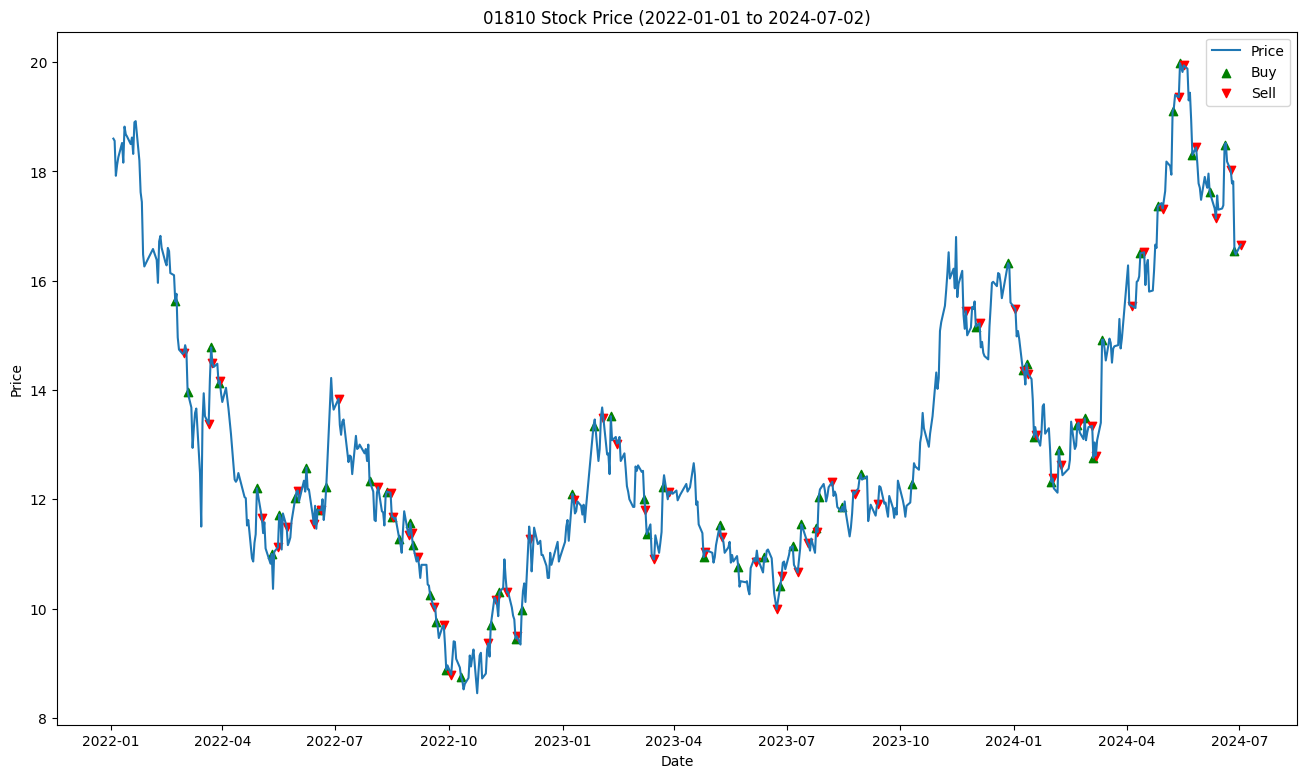

In [14]:
if __name__ == '__main__':
    main()